# Feature Selection

Como já fizemos uma feature selection preliminar aquando da preparação dos dados, agora vamos primeiro desenvolver diversos modelos e selecionar as features com base nos resultados obtidos pelos mesmos.

## Estratégias de Feature Selection

Estas estratégias geralmente dividem-se em 3 tipos:
* Filter Based
* Wrapper Based
* Embedded

A primeira corresponde a selecionar as features com base em indicadores como a variância do conjunto de valores de cada feature de um dataset. Esta abordagem é muito eficiente e é geralmente adotada em projetos que não pretendem que este processo introduza um grande overhead computacional no pipeline de desenvolvimento.

A segunda, por outro lado é mais computacionalmente intensiva, no entanto baseia-se em métricas que avaliam os próprios modelos de previsão. Por outras palavras estas estratégias consistem em verificar experimentalmente quais conjuntos de features retornam melhores reultados quano utilizados pelos modelos na previsão.

A terceira é semelhante à segunda, no entanto geralmente introduz a noçãod e custo e de complexidade para assim tentar escolher os conjuntos de features que trão uma melhor relação entre os resultados obtidos e o overhead computacional introduzido.



Como neste projeto não há uma limitação em termos computacionais, optaremos por um método wrapper based. 

## Wrapper Based methods

Como ostes métodos de seleção de features se baseiam nos resultados dos algoritmos, estes apenas são capazes de encontrar o melhor conjunto de features para cada algoritmo.

Assim, desenvolveremos primeiro os modelos de previsão para depois procedrmos à feature selection.

# Model Development

O problema que temos em mãos é um de classificação, em que dispomos da informação correta sobre o resultado.

Com base no trabalho desenvolvido nas aulas e em investigação fora das mesmas, consideraremos alguns algoritmos populares.

## Importar Datasets com os dados tratados

In [23]:
import pandas as pd
train = pd.read_csv('prep_train.csv')
train.head(10)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Education,Son,Weight,Height,Body mass index,Absent
0,0.0,0.545455,0.25,0.0,0.000000,0.170213,1.000000,1.000000,0.194471,0.769231,0.0,0.25,0.84,0.454545,0.631579,0.0
1,1.0,0.545455,0.50,0.0,0.225926,0.978723,1.000000,0.478261,0.194471,0.769231,0.0,0.00,0.66,0.212121,0.631579,0.0
2,1.0,0.636364,0.00,0.0,0.225926,0.978723,1.000000,0.478261,0.000000,0.384615,0.0,0.00,0.66,0.212121,0.631579,0.0
3,0.5,0.636364,0.25,0.0,0.633333,0.659574,0.666667,0.260870,0.000000,0.384615,0.0,0.50,0.68,0.272727,0.578947,0.0
4,0.5,0.636364,0.00,0.0,0.900000,1.000000,0.000000,0.043478,0.000000,0.384615,0.0,0.25,0.48,0.272727,0.421053,0.0
5,0.0,0.727273,0.00,1.0,0.525926,0.957447,0.533333,0.391304,0.205583,0.384615,0.0,1.00,0.18,0.151515,0.210526,0.0
6,0.0,0.727273,0.00,1.0,0.396296,0.446809,0.400000,0.043478,0.205583,0.384615,0.0,0.25,0.26,0.181818,0.263158,0.0
7,0.0,0.727273,0.25,1.0,0.633333,0.659574,0.666667,0.260870,0.205583,0.384615,0.0,0.50,0.68,0.272727,0.578947,0.0
8,0.0,0.727273,0.25,1.0,0.000000,0.170213,1.000000,1.000000,0.205583,0.384615,0.0,0.25,0.84,0.454545,0.631579,0.0
9,0.0,0.727273,0.50,1.0,0.929630,0.255319,0.600000,0.173913,0.205583,0.384615,0.0,0.75,0.28,0.181818,0.315789,0.0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing


classifiers = [
    KNeighborsClassifier(10),
    SVC(kernel='linear'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=10, min_samples_split=16),
	AdaBoostClassifier(n_estimators=10, learning_rate=0.01),
    GradientBoostingClassifier(n_estimators=10),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(alpha=0.99, hidden_layer_sizes=(32, 17), random_state=1, solver= 'adam', learning_rate='adaptive', learning_rate_init=0.001),
    LogisticRegression(solver='liblinear')]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=101)

X = train.values[0::, 0:-1]
y = train.values[0::, -1]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
    
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

    

/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/random/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

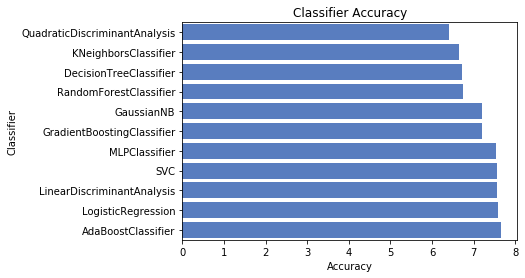

In [25]:
log = log.sort_values(by=['Accuracy'])
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

Sem qualquer tipo de seleção de features ou optimização das mesmas estes saão os resultados obtidos com estes modelos de previsão. 


Selecionámos alguns modelos com base nestes resultados preliminares (e coma intenção de ter alguma variedade em termos dos algoritmos aqui representados).

# Feature Selection




O método de feature selection que utilizaremos chama-se Recursive Feature Elimination, e consiste em sucessivamente descartar as features mais fracas e medir a eficácia do modelo (neste caso, a métrica que utilizamos é a accuracy)

/home/random/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Optimal number of features : 1
[ 1  7 12 10  6 11  9  4  3  5 15  8  2 13 14]
['Reason for absence']


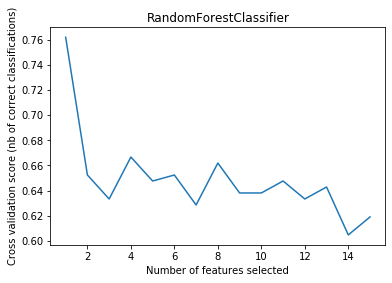

/home/random/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Optimal number of features : 11
[1 1 1 1 1 1 1 2 1 1 3 5 1 1 4]
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Work load Average/day ', 'Hit target', 'Weight', 'Height']


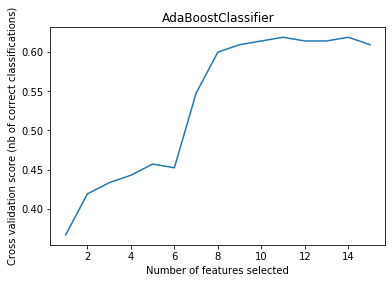

/home/random/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Optimal number of features : 1
[ 1  7  6  8  3 11 13  4  2  5 12 15 10  9 14]
['Reason for absence']


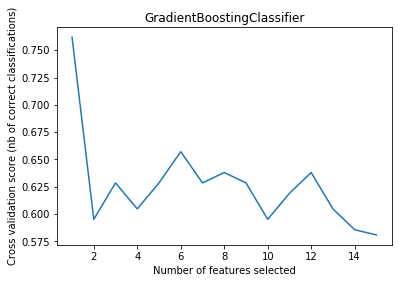

/home/random/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Optimal number of features : 12
[1 2 1 3 1 1 4 1 1 1 1 1 1 1 1]
['Reason for absence', 'Day of the week', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']


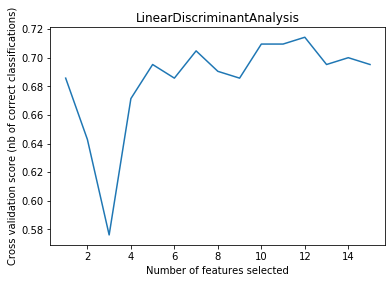

/home/random/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Optimal number of features : 14
[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1]
['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']


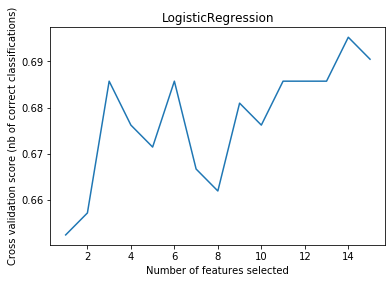

/home/random/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Optimal number of features : 1
[ 1 12  6 14  8 15 10  9  5  7  3  4  2 11 13]
['Reason for absence']


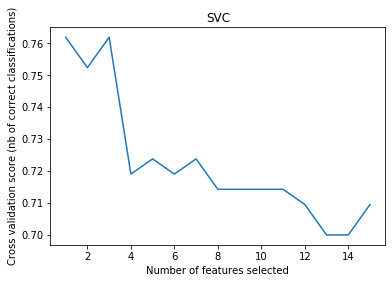

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, balanced_accuracy_score


classifiers = [
    RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=5, max_features='log2', min_impurity_decrease=0, min_samples_split=32, n_estimators=20, oob_score=False),
	AdaBoostClassifier(learning_rate=1, n_estimators=100),
    GradientBoostingClassifier(learning_rate=0.5, loss='exponential', max_depth=3, max_features='log2', min_impurity_decrease=0.001, min_samples_split=2, n_estimators=100),
    LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None),
    LogisticRegression(C=0.1, dual=False, fit_intercept=True, intercept_scaling=0.1, max_iter=10, multi_class= 'ovr', penalty='l2', solver='liblinear', tol=0.1),
    SVC(kernel="linear")]

for clf in classifiers:
    rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(), min_features_to_select= 1,
              scoring='balanced_accuracy')
    rfecv.fit(X, y)
    print("Optimal number of features : %d" % rfecv.n_features_)

    print(rfecv.ranking_)
    selected= []
    i = 0
    while i < len(rfecv.ranking_):
        if (rfecv.ranking_[i] == 1):
            selected.append(train.columns[i])
        i+=1
    print(selected)

    plt.figure()
    plt.title(clf.__class__.__name__)
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()

## Brute Force

Como não conseguimos para este modelo utilizar a mesma ferramenta que utilizáos nos outros, procederemos a uma solução menos eficiente mas tão ou mais eficaz. Voltamos a referir que este método é altamente ineficiente e apenas recorremos ao mesmo porque não temos grandes limitações em termos de tempo de computação e a sua implementação é extremamente simples (testar a accuracy para todos os subconjuntos de features e escolher o melhor).


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from itertools import combinations
from copy import deepcopy
from random import randint

import pandas as pd
train = pd.read_csv('prep_train.csv')
train.head(10)
features = list(train.columns)
features.remove('Absent')


classifiers = [
    GaussianNB()]


for clf in classifiers:
    print('############' + clf.__class__.__name__ + '##############')
    max = 0
    for i in range(1, len(features) + 1):
        print('%d of %d' % (i, len(features)))
        subs = combinations(features, i)
        for sub in subs:
            avg = 0
            iss = []
            while len(iss) < 5:
                r = randint(0,1000)
                if r not in iss:
                    clas = deepcopy(clf)
                    X_train, X_test, y_train, y_test = train_test_split(train.filter(items=sub), 
                                                                        train['Absent'], test_size=0.3, 
                                                                        random_state=r)

                    clas.fit(X_train,y_train)
                    predictions = clas.predict(X_test)

                    avg = (avg*len(iss) + balanced_accuracy_score(y_test,predictions))/float(len(iss) + 1)
                    iss.append(r)
            if avg >= max:
                ret = sub
                max = avg
            iss.append(r)

    print(len(ret))
    print(ret)
    print(max)
    print('##########################################')

############GaussianNB##############
1 of 16
2 of 16
3 of 16
4 of 16
5 of 16
6 of 16
7 of 16
8 of 16
9 of 16
10 of 16
11 of 16
12 of 16
13 of 16
14 of 16
15 of 16
16 of 16
6
('Reason for absence', 'Month of absence', 'Transportation expense', 'Age', 'Hit target', 'Height')
0.7779866606418067
##########################################


Como não temos nenhuma limitação a nível computacional, selecionaremos as features para o modelo GaussianNaiveBayes através de um método de força bruta que seleciona o subconjunto de features para o qual obtemos a maior accuracy média (para 5 divisões aleatórias do nosso dataset de treino).
Assim, para os seguintes modelos, as respetivas features selecionadas são:

* Random Forest: ['Reason for absence', 'Service time', 'Age', 'Work load Average/day ', 'Disciplinary failure']
* Ada Boost: ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Height', 'Body mass index']
* Gradient Boosting: ['Reason for absence', 'Month of absence', 'Day of the week', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Weight', 'Body mass index']
* Linear Discriminant Analysis: ['Reason for absence', 'Work load Average/day ', 'Disciplinary failure', 'Education', 'Son', 'Weight', 'Height', 'Body mass index']
* Logistic Regression: ['Reason for absence', 'Disciplinary failure']
* Gaussian Naive Bayes (recorrendo a brute force): ['Reason for absence', 'Month of absence', 'Transportation expense', 'Age', 'Hit target', 'Height']